# Lead Scoring Case Study

This case study aims to identify the most promising leads for an online education company through an assigned **lead score** to each lead in the purchasing funnel. The lead score is a feature built on top of a logistic regression model aimed at **increasing the target lead conversion rate.**

Libraries used in this case study: **Numpy, Pandas, Matplotlib, Seaborn, Scikit-learn, Scipy**

## List of Contents

**1. Introduction** <br>
1.1 - Understanding the Business Problem <br>
1.2 - Data <br>
1.3 - Importing Modules and Pulling Data <br>
**2. Data Cleaning** <br>
2.1 - Data Inspection <br>
2.2 - Data Cleaning <br>
**3. Exploratory Data Analysis** <br>
3.1 - Categorical Variables <br>
3.2 - Continuous Variables <br>
**4. Model Building** <br>
4.1 - Data Preparation <br>
4.2 - Feature Selection <br>
4.3 - Prediction and Result Analysis <br>
4.4 - Making Predictions on Test Dataset

## 1. Introduction

### 1.1 - Understanding the Business Problem

An education company named X Education sells online courses to industry professionals. They generate leads by marketing their products through several channels. They also generate leads through past referrals.

Their employees start the process of converting these leads. The current lead conversion rate is *30%*. To increase this low conversion rate, the company wants to identify a subset within the set of leads called **'Hot Leads'**. These leads have the most potential to convert compared to the rest. The company wants their employees to focus on the Hot leads more, leading to a higher conversion rate. 

The CEO of the company wants the target lead conversion rate to be around **80%**.

### 1.2 - Data

The data for this case study contains 2 sources of data. <br>

The first dataset *('Leads.csv')* contains all obtained information about past leads such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, among others. Target variable is the **'Converted'** column which indicates whether the lead converted or not.

The second dataset *(Leads Data Dictionary.csv')* is just a data dictionary elucidating the columns of the Leads dataset.

### 1.3 - Importing Modules and Data

In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing modules for model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# pulling data
leads_data = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 3 - Machine Learning - 1\Module 7 - Lead Scoring Case Study\Leads.csv')

## 2. Data Cleaning

Contains of the following parts: <br>
2.1 - Data Inspection <br>
2.2 - Data Cleaning

### 2.1 - Data Inspection

In this section, data will be inspected for duplicate values, datatypes checked, and summary statistics of the data analyzed.

In [4]:
# shape of data
leads_data.shape

(9240, 37)

In [5]:
# preview
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# column info of dataset
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

We see our dataset has **9240 rows and 37 columns** to work with. Columns mostly are of **object datatypes** and few columns are of **int and float datatypes**. Some columns also contain lots of **null** values.

In [7]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


As the first column 'Prospect ID' is the unique identifier for a customer, let's check if there are duplicate values in this column.

In [8]:
# checking for duplicates
sum(leads_data.duplicated(subset='Prospect ID')) > 0

False

On closer inspection of the dataset, most categorical variables have a **'Select'** value like shown below in the value counts:

In [9]:
leads_data.City.value_counts().head()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Name: City, dtype: int64

In [10]:
leads_data['Specialization'].value_counts().head()

Select                       1942
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

In [11]:
leads_data['Lead Profile'].value_counts().head()

Select                   4146
Potential Lead           1613
Other Leads               487
Student of SomeSchool     241
Lateral Student            24
Name: Lead Profile, dtype: int64

This value has most likely appeared everywhere due to the customer not selecting any option from a drop down menu of sorts in the form that the lead has filled out. So we can consider this value as a **null** value.

### 2.2 - Data Cleaning

In this section, missing values will be treated.

In [12]:
# replacing every select value as null
leads_data = leads_data.replace('Select', np.nan)

In [13]:
# checking the number of null values
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
# percentage of null values sorted
round(leads_data.isnull().sum()/(len(leads_data.index))*100,2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

From the above, we can are a few columns with over 30% null values. While some of them can be imputed, columns with over 50-60% will be very difficult to impute. Let's get rid of any variables over **60% null values**. For the remaining columns with null values, let's check each variable and see whether if they can be imputed or not.

In [15]:
leads_data = leads_data.drop(list(leads_data.columns[leads_data.isnull().sum()/(len(leads_data.index))*100 > 70.0]),axis=1)

In [16]:
leads_data.shape

(9240, 35)

Let's check each variable with null value and check whether it can be imputed or whether dropping the column is the better option.

In [17]:
leads_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

From the data dictionary, Lead Quality is based on the intuition of the employee. Therefore, we can add the nulls as part of the **'Not Sure'** category.

In [18]:
leads_data['Lead Quality'] = leads_data['Lead Quality'].replace(np.nan,'Not Sure')

In [19]:
leads_data['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [20]:
leads_data['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [21]:
leads_data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [22]:
leads_data['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

As the 4 variables above cannot be imputed with another category 'Others' or as the average/mode due to them having 45% null values which can highly skew the data. Best to drop these variables.

In [23]:
leads_data = leads_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'], axis = 1)

In [24]:
leads_data.shape

(9240, 31)

In [25]:
leads_data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [26]:
leads_data.City.value_counts()/leads_data.City.count()

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

Looking at the frequency above, the leads seem to be mostly from and around Mumbai and nearby cities such as Thane. As this almost accounts to 70% of the non null data, let's replace nulls with Mumbai. This would cause only a slight decrease in variation.

In [27]:
leads_data.City = leads_data.City.replace(np.nan,'Mumbai')

In [28]:
leads_data.City.value_counts()/leads_data.City.count()

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

As you can see above, Mumbai's total share only went up by 15% compared to the rest, which means it would still be the mode even if some other value had been imputed with the nulls.

In [29]:
leads_data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [30]:
leads_data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

Although Specialization did contain the **'Select'** category which indicated no option was chosen, the column also contained nulls. We converted the Select values into nulls. Let's convert all the nulls into a new category called **'Others'**.

In [31]:
leads_data.Specialization = leads_data.Specialization.replace(np.nan, 'Others')

In [32]:
leads_data.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

After going through the categories, we can replace the nulls with the **'Will revert after reading the email'** as we can safely assume the lead hasn't performed any action after the form submission email.

In [33]:
leads_data.Tags = leads_data.Tags.replace(np.nan,'Will revert after reading the email')

In [34]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Let's impute the nulls by the mode which is 'Better Career Prospects' as it clearly has a very high frequency of almost close to 100%.

In [35]:
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [36]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Let's impute the nulls by the mode which is 'Unemployed' which has around 85% of the frequency in this column.

In [37]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [38]:
leads_data.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

Let's impute the nulls by the mode which is 'India' which has around 95% of the frequency. 

In [39]:
leads_data.Country = leads_data.Country.replace(np.nan,'India')

In [40]:
# checking percentage of null values sorted
round(leads_data.isnull().sum()/(len(leads_data.index))*100,2).sort_values(ascending = False).head(10)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
What matters most to you in choosing a course    0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
dtype: float64

As we can see, most variables with high % of null values have been dealt with. Let's drop the rows containing null values as only 2% of data is missing from these columns.

In [41]:
leads_data.dropna(inplace=True)

In [42]:
# checking percentage of null values
round(leads_data.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [43]:
leads_data.shape

(9074, 31)

All missing values have been dealt with and we are left with 31 variables. Now let's analyze the data.

## 3. Exploratory Data Analysis

Contains of the following parts: <br>
3.1 - Categorical Variables <br>
3.2 - Continuous Variables

### 3.1 - Categorical Variables

Categorical variables will be analyzed and any changes required is made.

In [44]:
# analyzing the target variable converted
100*sum(leads_data.Converted)/len(leads_data.index)

37.85541106458012

There is a slight data imbalance with around 38% of converted cases compared to 62% of non converted cases.

In [45]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# Function to plot graphs for univariate analysis based on type of variable
def univariate_cat(df,col,hue =None):
    
    '''
    Univariate_cat function will plot a Countplot based on the parameters for categorical variables.
    df      : dataframe name
    col     : Column name
    hue     : (optional) Can analyze with respect to another categorical variable.
    
    '''
    sns.set(style="darkgrid")
   
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
    del temp      
    plt.show()

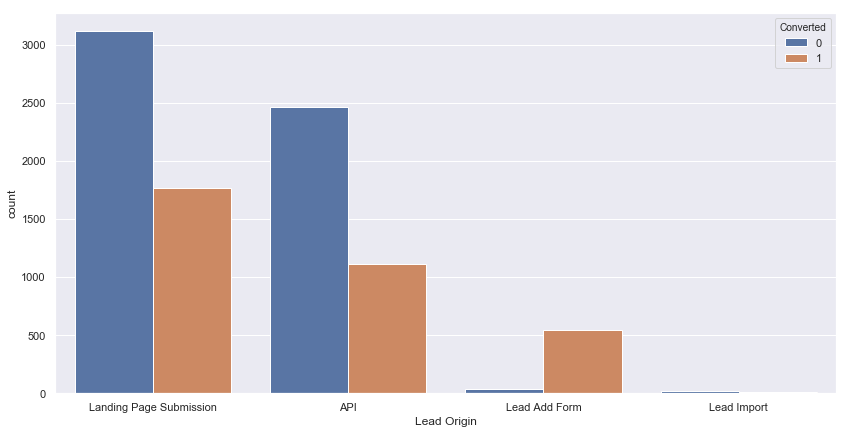

In [47]:
univariate_cat(leads_data,'Lead Origin', hue = 'Converted')

We can see that Landing Page Submission and API generate a lot of leads and have about 30-35% of converted leads while lead add form has an incredibly high number of leads converted (but don't generate many leads).

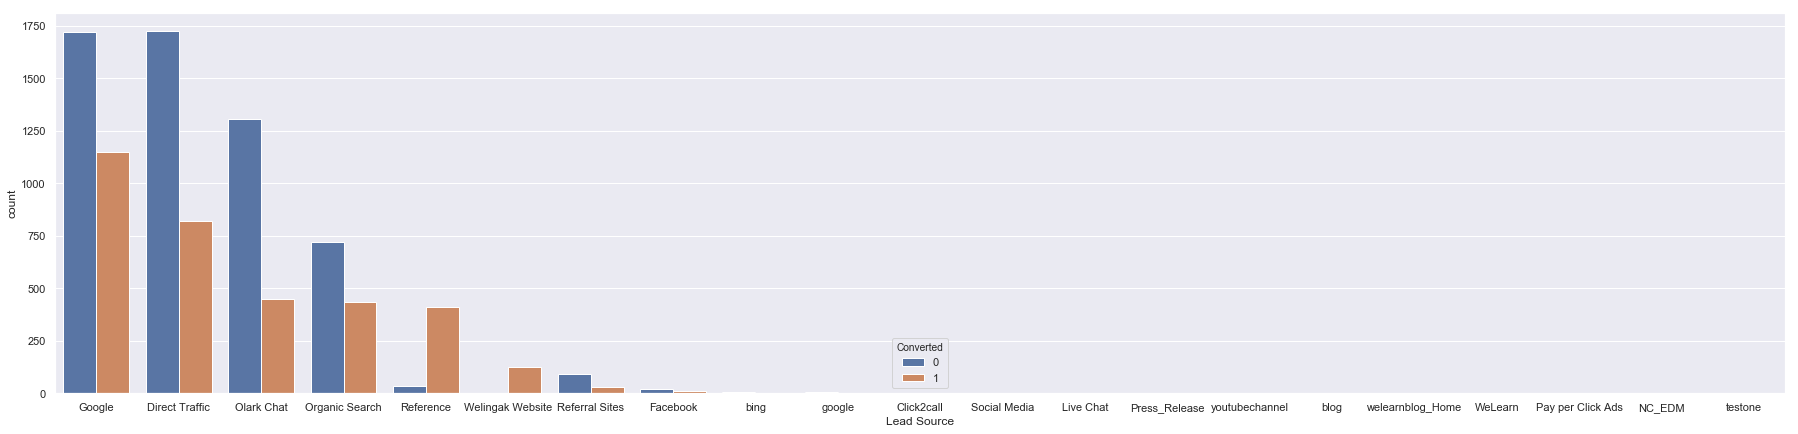

In [48]:
univariate_cat(leads_data,'Lead Source', hue = 'Converted')

Before analyzing Lead Source, let's group all the categories with very less frequency to a new category called 'Others'. Also the google category is repeated twice, so let's fix that.

In [49]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'],'Google')

In [50]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'],'Others')

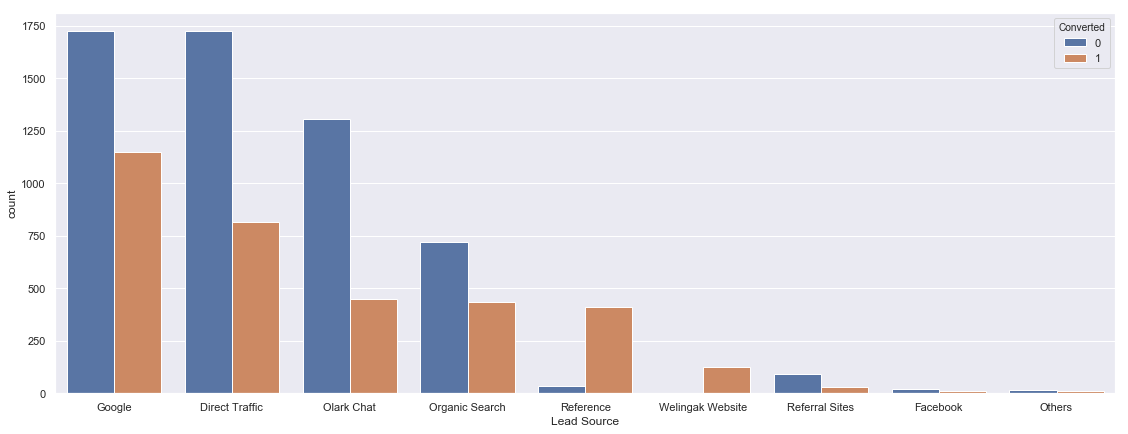

In [51]:
univariate_cat(leads_data,'Lead Source', hue = 'Converted')

Google, and Direct Traffic generate the most number of leads. However, leads from reference sources and welingak website have the highest conversion rates among these categories.

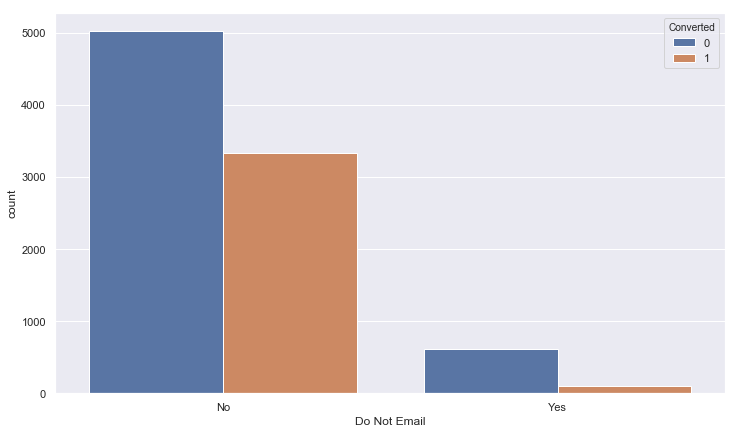

In [52]:
univariate_cat(leads_data,'Do Not Email', hue = 'Converted')

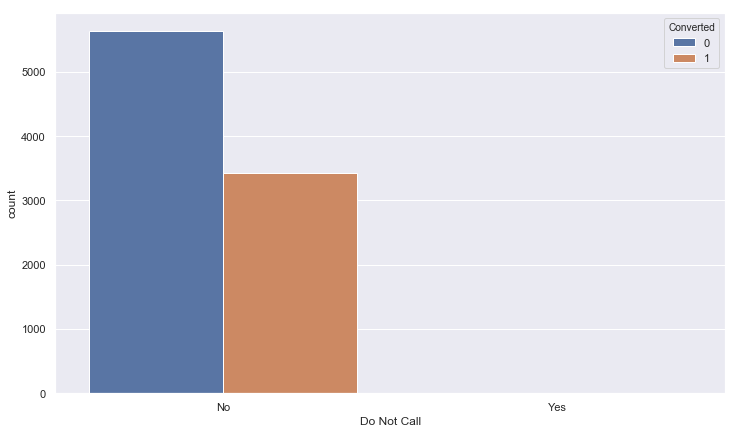

In [53]:
univariate_cat(leads_data,'Do Not Call', hue = 'Converted')

As seen above, most leads overwhelmingly prefer to be called and emailed despite them coverting or not.

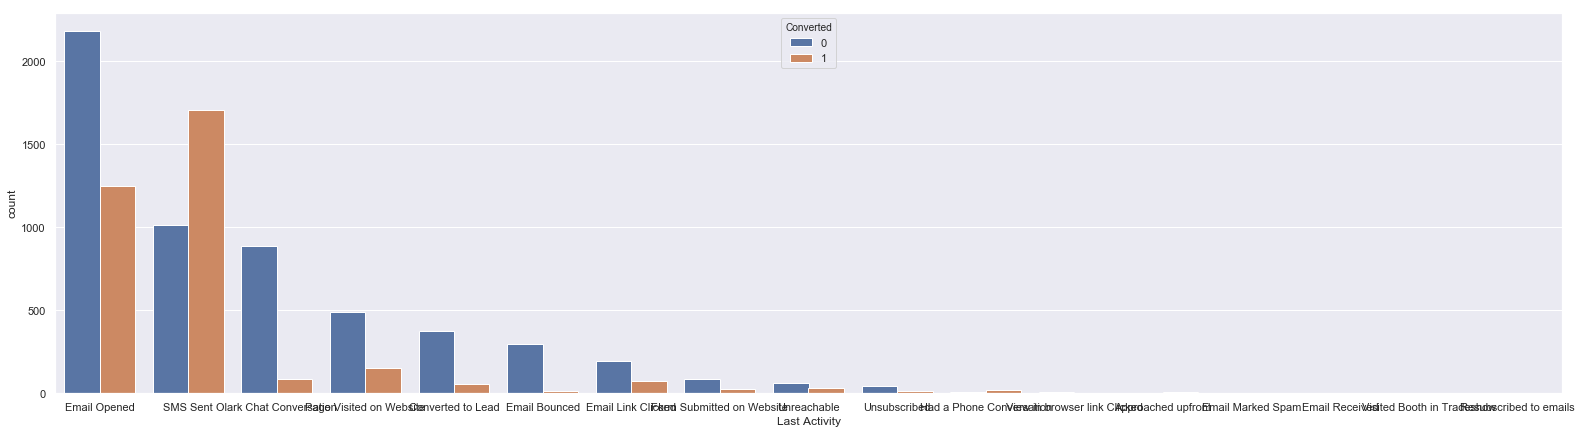

In [54]:
univariate_cat(leads_data,'Last Activity', hue = 'Converted')

Let's combine categories with low frequency to a category called 'Other_Activities'.

In [55]:
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activities')

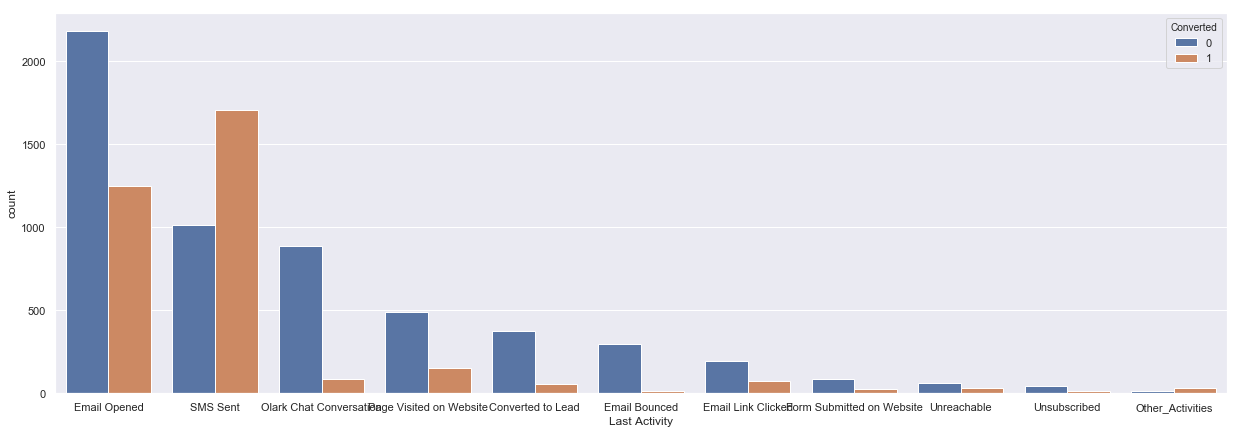

In [56]:
univariate_cat(leads_data,'Last Activity', hue = 'Converted')

The last activity for majority of leads is them opening their email. The conversion rate when the last activity is SMS sent is the highest.

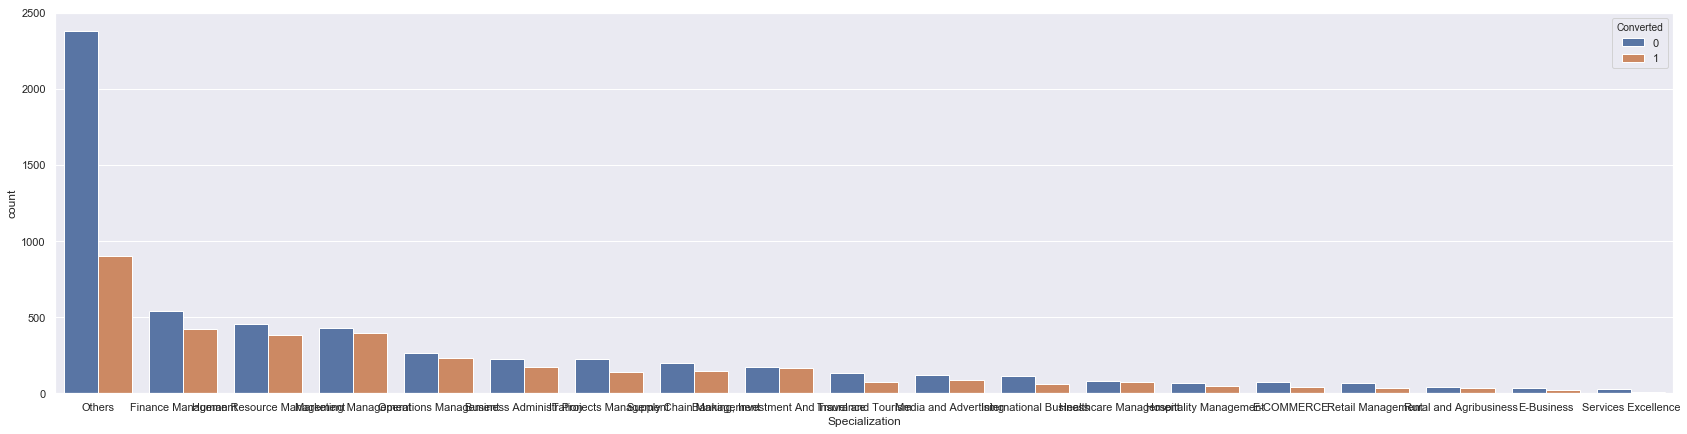

In [57]:
univariate_cat(leads_data,'Specialization', hue = 'Converted')

To increase conversion rate, more emphasis on occupations with high conversion rate.

In [58]:
leads_data['Specialization'] = leads_data['Specialization'].replace(['Others'], 'Other_Specializations')

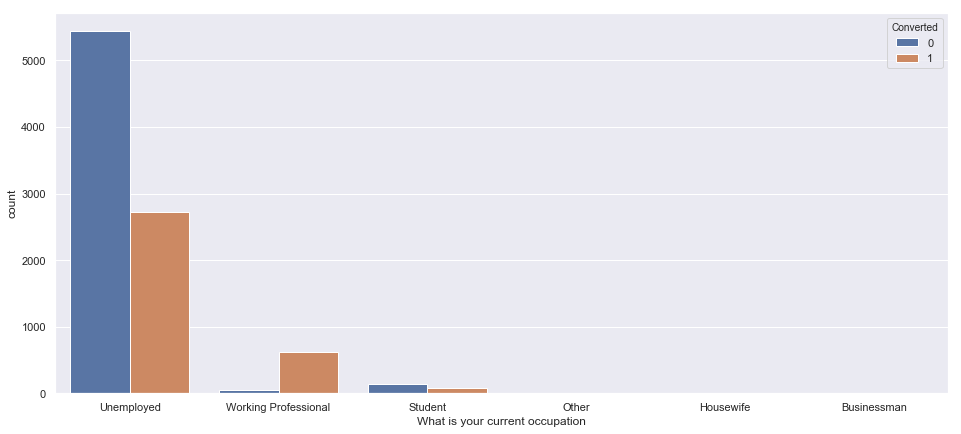

In [59]:
univariate_cat(leads_data,'What is your current occupation', hue = 'Converted')

Working professionals have high conversion rates while most leads are generated from Unemployed leads.

In [60]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(['Other'], 'Other_Occupations')

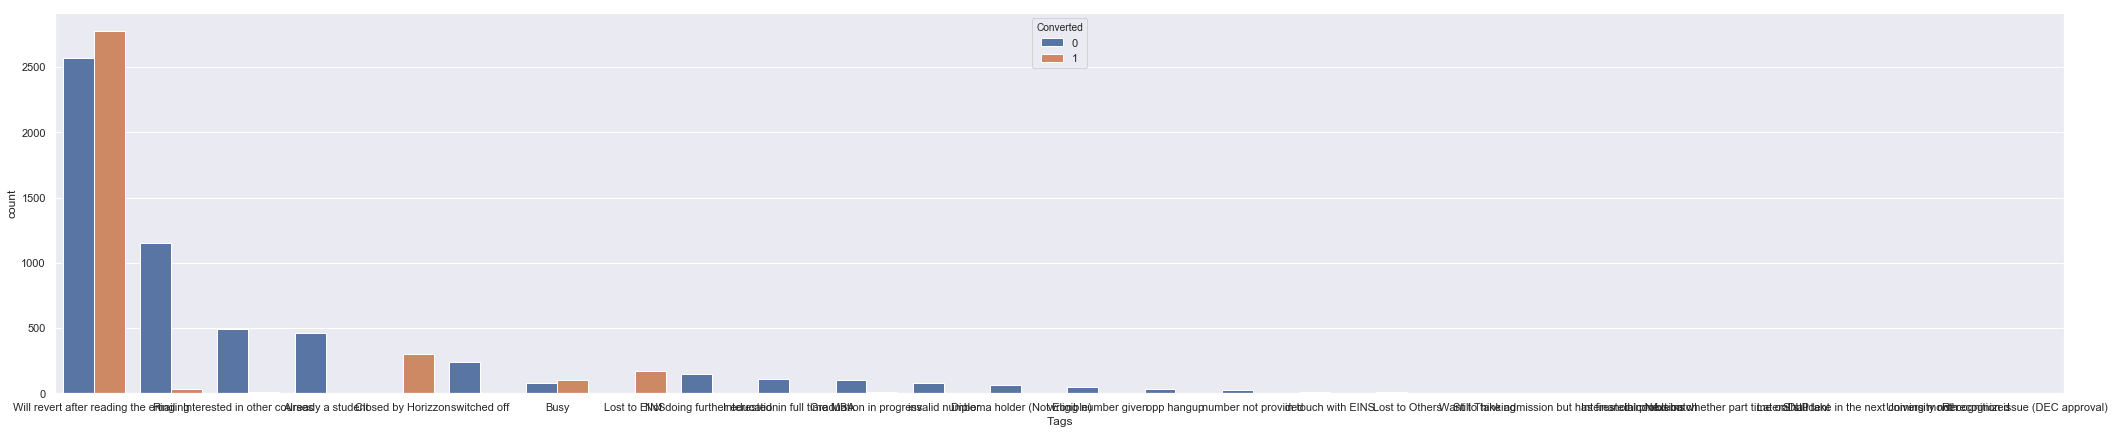

In [61]:
univariate_cat(leads_data,'Tags', hue = 'Converted')

In [62]:
# combining low frequency categories in tags to other tags
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other_Tags')

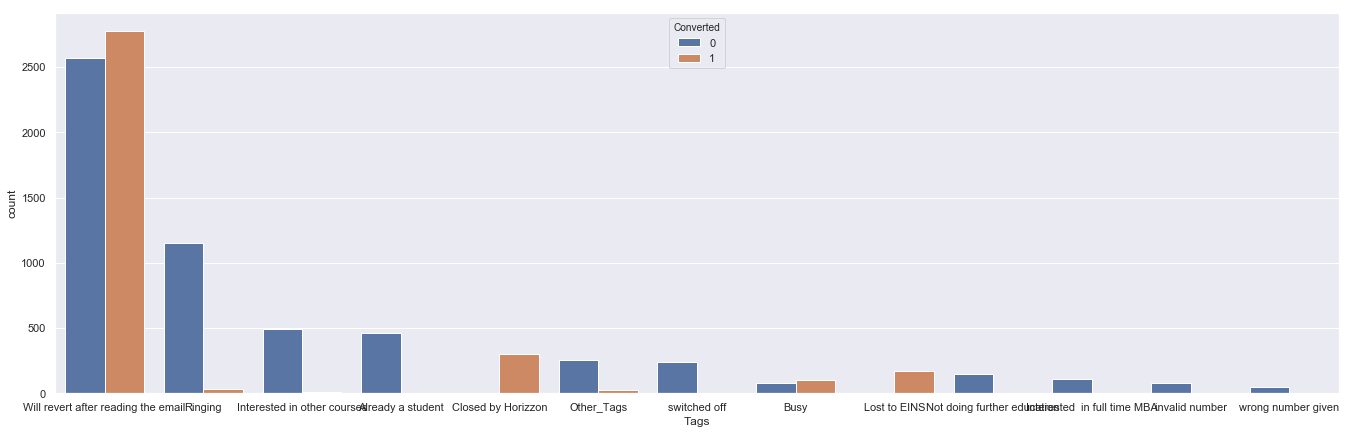

In [63]:
univariate_cat(leads_data,'Tags', hue = 'Converted')

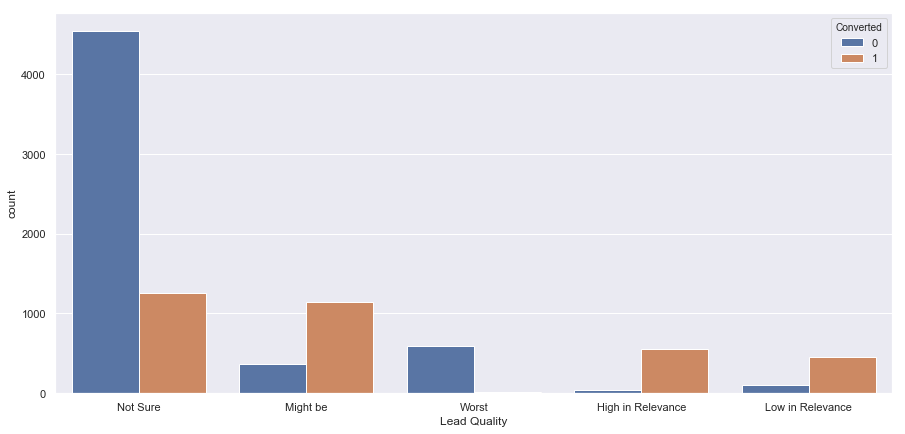

In [64]:
univariate_cat(leads_data,'Lead Quality', hue = 'Converted')

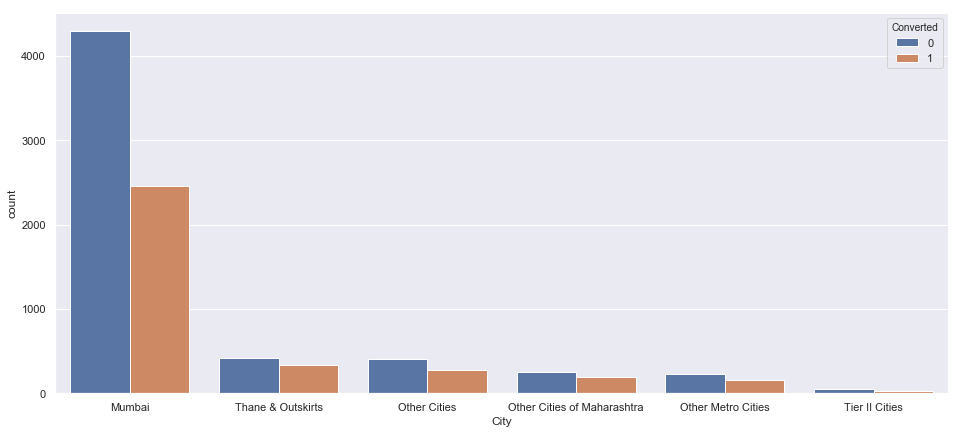

In [65]:
univariate_cat(leads_data,'City', hue = 'Converted')

As from before, most leads are generated from mumbai which has a conversion rate about 30-35%. Other cities and areas seem to have slightly better conversion rates.

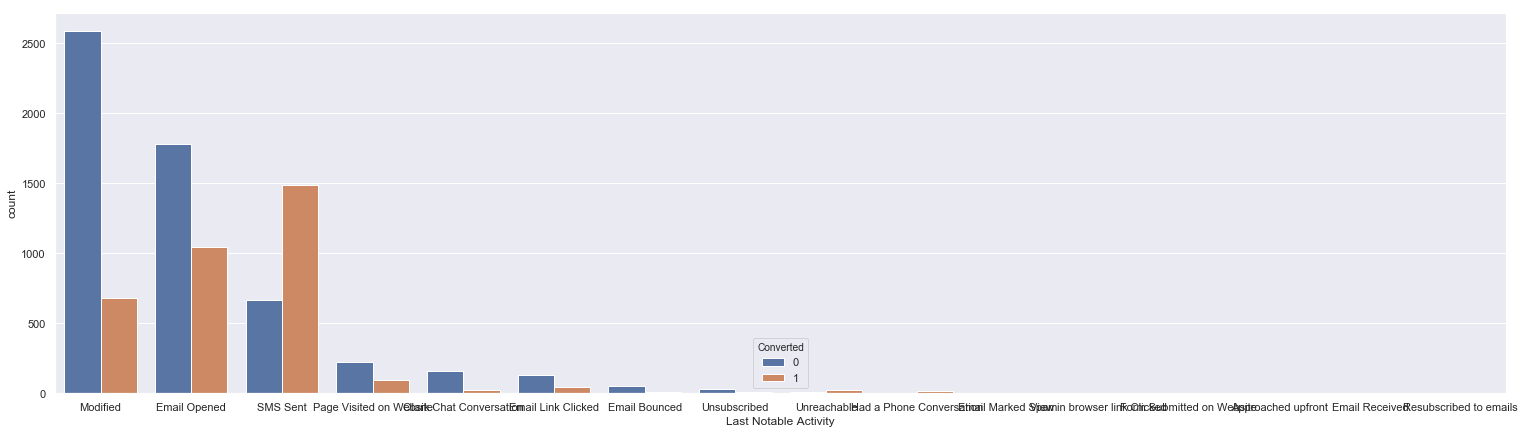

In [66]:
univariate_cat(leads_data,'Last Notable Activity', hue = 'Converted')

Some categorical variables were not analzyed because no inferences could be made due to the columns not having enough categories or having a category thats overwhelmingly dominant compared to the others. Some of these categorical variables also happen to be an heavily imbalanced flag column. These columns are: **Country, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, and A free copy of Mastering The Interview.**

### 3.2 - Continuous Variables

Continuous Variables will be analyzed and any required changes such as outlier treatment is made.

In [67]:
# Function to plot graphs for univariate analysis based on type of variable
def univariate_con(df,col,col2):
    
    '''
    Univariate function will plot a Boxplot based on the parameters.
    df      : dataframe name
    col     : Column name
    '''
    sns.set(style="darkgrid")
    
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.boxplot(data=df, x='Converted', y=col)
    plt.subplot(122)
    sns.boxplot(data=df, x='Converted', y=col2)
    plt.show()

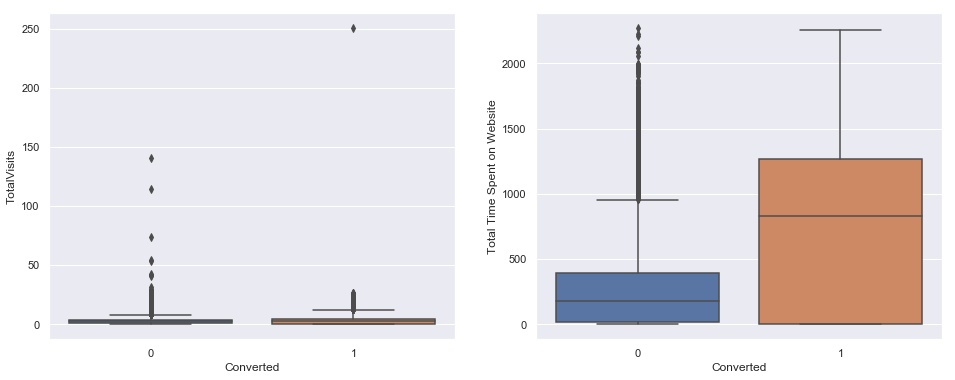

In [68]:
univariate_con(leads_data, 'TotalVisits', 'Total Time Spent on Website')

Total Visits contains a lot of outliers. Let's treat them.

In [69]:
# removing outliers below 5% and above 95%
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][ leads_data['TotalVisits'] <= percentiles[0] ] = percentiles[0]
leads_data['TotalVisits'][ leads_data['TotalVisits'] >= percentiles[1] ] = percentiles[1]

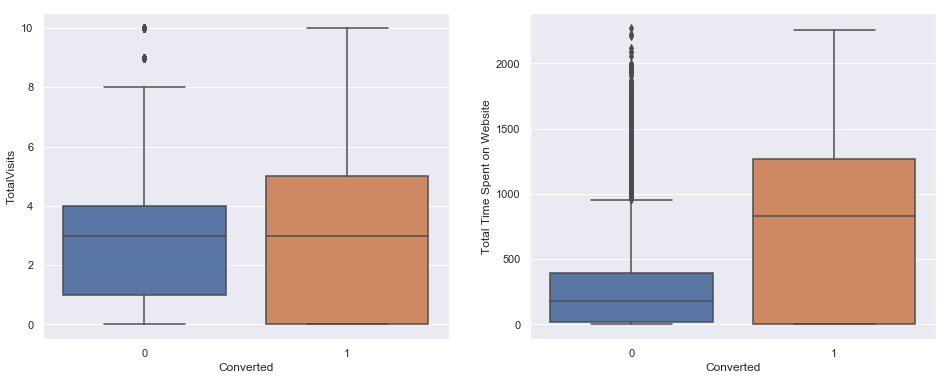

In [70]:
univariate_con(leads_data, 'TotalVisits', 'Total Time Spent on Website')

We can see that the median for both converted and non converted wrt to Total Visits is the same. Leading more time on the website is a higher probability to get converted.

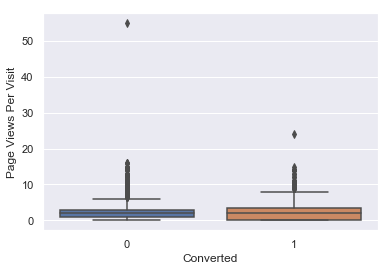

In [71]:
sns.boxplot(data=leads_data, x='Converted', y='Page Views Per Visit')

Page views per visit column contains a lot of outliers. Let's treat them.

In [72]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][ leads_data['Page Views Per Visit'] <= percentiles[0] ] = percentiles[0]
leads_data['Page Views Per Visit'][ leads_data['Page Views Per Visit'] >= percentiles[1] ] = percentiles[1]

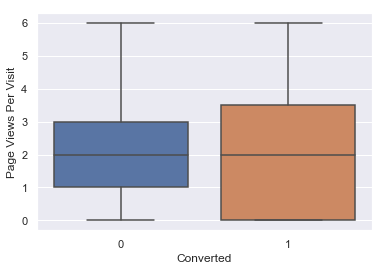

In [73]:
sns.boxplot(data=leads_data, x='Converted', y='Page Views Per Visit')

Apart from having same medians for both converted and non converted wrt to Page views per visit, nothing else can be said about this variable.

Based on the analysis done above, we see that we can drop many columns as they don't really add any useful information. Almost all of these are the flag columns obtained as part of the dataset.

In [74]:
leads_data = leads_data.drop(['Lead Number','Country','What matters most to you in choosing a course','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], axis = 1)

In [75]:
leads_data.shape

(9074, 16)

In [76]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specializations,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specializations,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specializations,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


After Exploratory Data Analyis, the number of variables to be considered for our model has dropped down to **16 from 31.**

## 4. Model Building

Contains of the following parts: <br>
4.1 - Data Preparation <br>
4.2 - Feature Selection <br>
4.3 - Prediction and Result Analysis <br>
4.4 - Making Predictions on Test Dataset

### 4.1 - Data Preparation

Let's prepare the data before we build our model through converting Yes/No to binary, encoding, feature scaling, and splitting data into train and test datasets.

In [77]:
# converting all Yes/No columns to binary
varlist_binary = ['Do Not Email','Do Not Call']

# map function for converting
def binary(x):
    return (x.map({'Yes': 1, 'No': 0}))

leads_data[varlist_binary] = leads_data[varlist_binary].apply(binary)

In [78]:
leads_data

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,Other_Specializations,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,Other_Specializations,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,Other_Specializations,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,0,0,0,0.0,0,0.00,Olark Chat Conversation,Other_Specializations,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,0,0,0,0.0,0,0.00,Olark Chat Conversation,Other_Specializations,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.00,Email Opened,IT Projects Management,Unemployed,Will revert after reading the email,Not Sure,Thane & Outskirts,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,0,0,0,4.0,58,4.00,Email Opened,Finance Management,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Email Opened


In [79]:
# encoding categorical variables with dummies
dummy_vars = pd.get_dummies(leads_data[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity','City']], drop_first=True)
dummy_vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# combining original dataset and dummies dataset
leads_data = pd.concat([leads_data, dummy_vars], axis = 1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# dropping the original variables which were a part of the leads_data
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
leads_data.shape

(9074, 87)

The data after encoding contains 9074 rows and 87 columns. Number of columns has gone up due to encoding of the categorical variables.

In [83]:
# dropping the prospect id variable and converted variable on the X dataset
X = leads_data.drop(['Prospect ID', 'Converted'], axis = 1)
# assigning respose variable to y
y = leads_data.Converted

In [84]:
# previewing X dataset
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# previewing y dataset
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [86]:
# splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [87]:
# scaler object
scaler = StandardScaler()
# applying scaler object on unequal columns to ensure same scale
X_train[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']])

In [88]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7879,0,0,-1.153346,-0.885739,-1.269032,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418,0,0,-0.064897,-0.706726,0.406476,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7069,0,0,-0.427713,-0.525886,-0.152027,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5979,0,0,-0.427713,2.791345,-0.152027,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4510,0,0,1.386368,-0.429072,-0.487129,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


As we had seen earlier, the lead conversion rate is around 38%. The 'Converted' variable is the response variable. There is a slight presence of data imbalance.

### 4.2 - Feature Selection

As we have 85 variables, let's first utilize RFE to reduce the number of variables to 15, and then manually perform a backward stepwise selection on the remaning columns by dropping highly correlated or unstable variables.

In [154]:
# logistic regression object
log_reg2 = LogisticRegression()

# rfe object with 15 variables as output
rfe2 = RFE(log_reg, 3, random_state = 100)
# fitting the RFE on the training dataset
rfe2 = rfe2.fit(X_train, y_train)

In [155]:
# a list of columns, whether they are selected, and their rank
list(zip(X_train.columns, rfe2.support_, rfe2.ranking_))

[('Do Not Email', False, 12),
 ('Do Not Call', False, 52),
 ('TotalVisits', False, 46),
 ('Total Time Spent on Website', False, 14),
 ('Page Views Per Visit', False, 45),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', False, 10),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Source_Facebook', False, 62),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Olark Chat', False, 19),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 64),
 ('Lead Source_Reference', False, 69),
 ('Lead Source_Referral Sites', False, 78),
 ('Lead Source_Welingak Website', False, 3),
 ('Last Activity_Email Bounced', False, 49),
 ('Last Activity_Email Link Clicked', False, 65),
 ('Last Activity_Email Opened', False, 60),
 ('Last Activity_Form Submitted on Website', False, 55),
 ('Last Activity_Olark Chat Conversation', False, 23),
 ('Last Activity_Other_Activities', False, 17),
 ('Last Activity_Page Visited on Website', False, 53),
 ('Last Activity

In [156]:
# columns which are selected by the rfe algorithm
rfe_cols2 = X_train.columns[rfe2.support_]
rfe_cols2

Index(['Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [89]:
# logistic regression object
log_reg = LogisticRegression()

# rfe object with 15 variables as output
rfe = RFE(log_reg, 15)
# fitting the RFE on the training dataset
rfe = rfe.fit(X_train, y_train)

In [90]:
# checking the rfe support
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False])

In [91]:
# a list of columns, whether they are selected, and their rank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 40),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 52),
 ('Lead Source_Reference', False, 57),
 ('Lead Source_Referral Sites', False, 66),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 37),
 ('Last Activity_Email Link Clicked', False, 53),
 ('Last Activity_Email Opened', False, 48),
 ('Last Activity_Form Submitted on Website', False, 43),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Other_Activities', False, 5),
 ('Last Activity_Page Visited on Website', False, 41),
 ('Last Activity_SMS Sen

In [92]:
# columns which are selected by the rfe algorithm
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [93]:
# adding a constant to get beta0 value
X_train_rfe = sm.add_constant(X_train[rfe_cols])

# running the logistic model
log_model = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
results1 = log_model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1614.8
Date:                Mon, 26 Aug 2019   Deviance:                       3229.6
Time:                        19:26:54   Pearson chi2:                 2.67e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8593      0.218     -8.514      0.000      -2.287      -1.431
Do Not Email                                            -1.1342      0.210     -5.409      0.000      -1.545      -0.723
Lead Origin_Lead Add Form                                1.1670      0.382      3.058      0.002       0.419       1.915
Lead Source_Welingak Website                             3.1990      0.825      3.877      0.000       1.582       4.816
What is your current occupation_Working Professional     1.2127      0.304      3.986      0.000       0.616       1.809
Tags_Busy                                                3.7787      0.328     11.513      0.000       3.135       4.422
Tags_Closed by Horizzon                                  7.7251      0.766     10.085      0.000       6.224       9.226
Tags_Lost to EINS                                        8.5917      0.648     13.263      0.000       7.322       9.861
Tags_Ringing                                            -1.5817      0.327     -4.831      0.000      -2.223      -0.940
Tags_Will revert after reading the email                 3.6844      0.232     15.872      0.000       3.229       4.139
Tags_invalid number                                    -23.1189   2.23e+04     -0.001      0.999   -4.37e+04    4.37e+04
Tags_switched off                                       -2.2709      0.591     -3.841      0.000      -3.430      -1.112
Tags_wrong number given                                -22.7161   2.86e+04     -0.001      0.999    -5.6e+04     5.6e+04
Lead Quality_Not Sure                                   -3.3284      0.127    -26.132      0.000      -3.578      -3.079
Lead Quality_Worst                                      -4.6901      1.024     -4.581      0.000      -6.697      -2.683
Last Notable Activity_SMS Sent                           2.6592      0.118     22.509      0.000       2.428       2.891
========================================================================================================================
"""

Let's drop the Tags_wrong number given column as it has a high p-value of 0.999!

In [94]:
# dropping the unstable variable
cols2 = rfe_cols.drop('Tags_wrong number given')

In [95]:
# repeating the logistic model with the updated list of columns
X_train_2 = sm.add_constant(X_train[cols2])
log_model2 = sm.GLM(y_train,X_train_2, family = sm.families.Binomial())
results2 = log_model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1616.9
Date:                Mon, 26 Aug 2019   Deviance:                       3233.9
Time:                        19:26:54   Pearson chi2:                 2.68e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9322      0.218     -8.862      0.000      -2.360      -1.505
Do Not Email                                            -1.1379      0.209     -5.439      0.000      -1.548      -0.728
Lead Origin_Lead Add Form                                1.1744      0.382      3.071      0.002       0.425       1.924
Lead Source_Welingak Website                             3.1916      0.825      3.867      0.000       1.574       4.809
What is your current occupation_Working Professional     1.2290      0.306      4.019      0.000       0.630       1.828
Tags_Busy                                                3.8561      0.327     11.786      0.000       3.215       4.497
Tags_Closed by Horizzon                                  7.7951      0.766     10.179      0.000       6.294       9.296
Tags_Lost to EINS                                        8.6610      0.647     13.378      0.000       7.392       9.930
Tags_Ringing                                            -1.5006      0.326     -4.600      0.000      -2.140      -0.861
Tags_Will revert after reading the email                 3.7584      0.231     16.240      0.000       3.305       4.212
Tags_invalid number                                    -22.0367   1.35e+04     -0.002      0.999   -2.65e+04    2.65e+04
Tags_switched off                                       -2.1890      0.590     -3.707      0.000      -3.346      -1.032
Lead Quality_Not Sure                                   -3.3278      0.127    -26.142      0.000      -3.577      -3.078
Lead Quality_Worst                                      -4.6661      1.033     -4.519      0.000      -6.690      -2.642
Last Notable Activity_SMS Sent                           2.6490      0.118     22.513      0.000       2.418       2.880
========================================================================================================================
"""

Let's drop the Tags_invalid number column as it has a high p value.

In [96]:
# dropping the unstable variable
cols3 = cols2.drop('Tags_invalid number')

In [97]:
# repeating the logistic model with the updated list of columns
X_train_3 = sm.add_constant(X_train[cols3])
log_model3 = sm.GLM(y_train,X_train_3, family = sm.families.Binomial())
results3 = log_model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1621.3
Date:                Mon, 26 Aug 2019   Deviance:                       3242.6
Time:                        19:26:54   Pearson chi2:                 2.67e+04
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0692      0.219     -9.449      0.000      -2.498      -1.640
Do Not Email                                            -1.1360      0.209     -5.443      0.000      -1.545      -0.727
Lead Origin_Lead Add Form                                1.1898      0.384      3.102      0.002       0.438       1.942
Lead Source_Welingak Website                             3.1745      0.826      3.844      0.000       1.556       4.793
What is your current occupation_Working Professional     1.2602      0.309      4.083      0.000       0.655       1.865
Tags_Busy                                                4.0016      0.326     12.267      0.000       3.362       4.641
Tags_Closed by Horizzon                                  7.9262      0.766     10.346      0.000       6.425       9.428
Tags_Lost to EINS                                        8.7954      0.648     13.575      0.000       7.526      10.065
Tags_Ringing                                            -1.3431      0.325     -4.138      0.000      -1.979      -0.707
Tags_Will revert after reading the email                 3.8959      0.232     16.809      0.000       3.442       4.350
Tags_switched off                                       -2.0295      0.589     -3.444      0.001      -3.184      -0.875
Lead Quality_Not Sure                                   -3.3236      0.127    -26.143      0.000      -3.573      -3.074
Lead Quality_Worst                                      -4.6753      1.029     -4.543      0.000      -6.692      -2.658
Last Notable Activity_SMS Sent                           2.6225      0.117     22.497      0.000       2.394       2.851
========================================================================================================================
"""

Model contains no more unstable variables. Let's check the variables for collinearity as well.

In [98]:
# dataframe of features and respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols2].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols2].values, i) for i in range(X_train[cols2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Quality_Not Sure,2.96
8,Tags_Will revert after reading the email,2.93
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.58
13,Last Notable Activity_SMS Sent,1.50
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.16
10,Tags_switched off,1.12
0,Do Not Email,1.11


Model contains variables with less collinearity as the VIFs are all less than 5.

### 4.3 - Prediction and Result Analysis

The algorithm is used to predict the response variable. The predictions are compared with the actual values of the response variables and the results are analyzed using various metrics such as accuracy, sensitivity, precision, etc. The ROC curve is analyzed and the optimal cutoff probability is found.

In [99]:
# predicting the y_train values using the best model
y_train_pred = results3.predict(X_train_3)
y_train_pred.head()

7879    0.182880
418     0.001186
7069    0.755020
5979    0.861358
4510    0.000597
dtype: float64

The predicted values are the probabilities of a lead converting.

In [100]:
y_train_pred = y_train_pred.values.reshape(-1)

In [101]:
# creating a new dataframe with the actual lead conversion and predicted probabilites of lead conversion
y_train_pred_data = pd.DataFrame({'Prospect ID': y_train.index, 'Converted':y_train.values, 'Probability':y_train_pred})
y_train_pred_data.head()

,Prospect ID,Converted,Probability
0,7879,0,0.182880
1,418,0,0.001186
2,7069,0,0.755020
3,5979,1,0.861358
4,4510,0,0.000597


In [102]:
# conversion (1) if probability > 0.5, non conversion (0) if probability < 0.5
y_train_pred_data['Predicted'] = y_train_pred_data.Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_data.head()

,Prospect ID,Converted,Probability,Predicted
0,7879,0,0.182880,0
1,418,0,0.001186,0
2,7069,0,0.755020,1
3,5979,1,0.861358,1
4,4510,0,0.000597,0


Let's analyze and see how well our model predicted using some metrics.

In [103]:
# printing the accuracy score
print(metrics.accuracy_score(y_train_pred_data.Converted, y_train_pred_data.Predicted))

0.9170209415840025


The model has an accuracy score of approximately **92%**. However, we care more about the accuracy of the customers who convert than the ones who don't convert. So we also have to check the correctly predicted converted customers out of all customers who actually convert. i.e. **Sensitivity**.

In [104]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_data.Converted, y_train_pred_data.Predicted)

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# sensitivity
TP / float(TP+FN)

0.8442657638595006

In [107]:
# specificity
TN / float(TN+FP)

0.9601303911735206

In [108]:
# false postive rate - predicting lead conversion when customer hasnt converted
print(FP / float(TN+FP))

0.03986960882647944


In [109]:
# false negative rate - predicting non lead conversion when customer has converted 
print(FN / float(TP+FN))

0.15573423614049936


In [110]:
# positive predictive value 
print (TP / float(TP+FP))

0.9261838440111421


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9123183226113891


From the above metrics, our model correctly predicts a customer who churns out of all customers who churn, **84%** of the time (Sensitivity). This means the model incorrectly classifies a converting customer as non converting **16%** of the time (False Negative Rate).

We took 0.5 probability as the cutoff point between conversion and non conversion. Let's plot the ROC curve to check wither 0.5 is the optimal point or not.

In [112]:
# function to plot roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

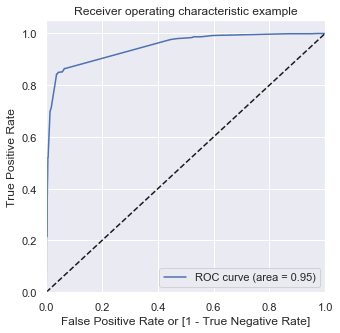

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data.Probability, drop_intermediate = False)
draw_roc(y_train_pred_data.Converted, y_train_pred_data.Probability)

In [114]:
# creating columns with different probability cutoffs to find the optimal point 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_data[i]= y_train_pred_data.Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_data.head()

,Prospect ID,Converted,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,7879,0,0.182880,0,1,1,0,0,0,0,0,0,0,0
1,418,0,0.001186,0,1,0,0,0,0,0,0,0,0,0
2,7069,0,0.755020,1,1,1,1,1,1,1,1,1,0,0
3,5979,1,0.861358,1,1,1,1,1,1,1,1,1,1,0
4,4510,0,0.000597,0,1,0,0,0,0,0,0,0,0,0


In [115]:
# calculating the accuracy, sensitivity, and specificity metrics for each of the probability cutoffs
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

probs = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in probs:
    cm1 = metrics.confusion_matrix(y_train_pred_data.Converted, y_train_pred_data[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.372067,1.000000,0.000000
0.1,0.1,0.696741,0.980110,0.528837
0.2,0.2,0.908361,0.851037,0.942327
0.3,0.3,0.908833,0.851037,0.943079
0.4,0.4,0.917178,0.848921,0.957623
0.5,0.5,0.917021,0.844266,0.960130
0.6,0.6,0.917336,0.843419,0.961133
0.7,0.7,0.916234,0.836225,0.963641
0.8,0.8,0.879389,0.699534,0.985958
0.9,0.9,0.817037,0.517986,0.994233


Let's plot the above to get a better visual representation.

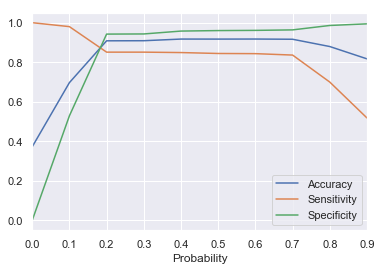

In [116]:
# plotting above metrics for different probabilities
cutoff_df.plot.line(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

From the above, we can see that 0.2 is the optimal cutoff point. Let's reassign the predictions based on this cutoff and recheck our metrics.

In [117]:
# taking 0.2 as the optimal cut off probability
y_train_pred_data['Predicted_optimal'] = y_train_pred_data.Probability.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_data.head()

,Prospect ID,Converted,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_optimal
0,7879,0,0.182880,0,1,1,0,0,0,0,0,0,0,0,0
1,418,0,0.001186,0,1,0,0,0,0,0,0,0,0,0,0
2,7069,0,0.755020,1,1,1,1,1,1,1,1,1,0,0,1
3,5979,1,0.861358,1,1,1,1,1,1,1,1,1,1,0,1
4,4510,0,0.000597,0,1,0,0,0,0,0,0,0,0,0,0


In [118]:
# rechecking the accuracy measures

# printing the accuracy score
print(metrics.accuracy_score(y_train_pred_data.Converted, y_train_pred_data.Predicted_optimal))

0.9083608880491261


In [119]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_data.Converted, y_train_pred_data.Predicted_optimal)

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# sensitivity
TP / float(TP+FN)

0.8510368176047397

In [122]:
# specificity
TN / float(TN+FP)

0.9423269809428285

In [123]:
# false postive rate - predicting lead conversion when customer hasnt converted
print(FP / float(TN+FP))

0.057673019057171516


In [124]:
# false negative rate - predicting non lead conversion when customer has converted 
print(FN / float(TP+FN))

0.14896318239526027


In [125]:
# positive predictive value 
print (TP / float(TP+FP))

0.8973672467648371


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9143552311435523


From the above metrics, we can see that even though the overall accuracy score dropped to **91%**, the sensitivity has risen to **85%**. We have also decreased the false negative rate to **15%**. These improvements are because of choosing the optimal cutoff probability.

We can also look at the Precision vs. Recall metrics to understand how good the model is performing.

In [127]:
# getting the precision score
precision_score(y_train_pred_data.Converted , y_train_pred_data.Predicted)

0.9261838440111421

In [128]:
# getting the recall score
recall_score(y_train_pred_data.Converted, y_train_pred_data.Predicted)

0.8442657638595006

Precision and Recall are at a tradeoff. Increase one and the other metric decreases. Let's visualize the tradeoff.

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_data.Converted, y_train_pred_data.Probability)

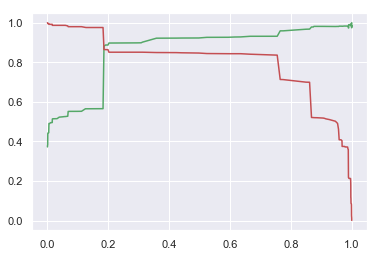

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Looking at the above, even in this case, 0.2 seems like the optimal probability to balance them both.

With our metrics balanced, let's assign the lead score to our dataset. The calculation of the Lead Score is just Probability times 100.

In [131]:
# assigning lead score
y_train_pred_data['Lead_Score'] = y_train_pred_data.Probability.map( lambda x: round(x*100))
y_train_pred_data.head()

,Prospect ID,Converted,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_optimal,Lead_Score
0,7879,0,0.182880,0,1,1,0,0,0,0,0,0,0,0,0,18
1,418,0,0.001186,0,1,0,0,0,0,0,0,0,0,0,0,0
2,7069,0,0.755020,1,1,1,1,1,1,1,1,1,0,0,1,76
3,5979,1,0.861358,1,1,1,1,1,1,1,1,1,1,0,1,86
4,4510,0,0.000597,0,1,0,0,0,0,0,0,0,0,0,0,0


### 4.4 - Making Predictions on the Test Dataset

The algorithm found on the training dataset is applied on the test dataset to predict the response variable. The predictions are compared to actual values. The results are analyzed using the same metrics which are used in the previous section.

In [132]:
# applying scaler on the X test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4372,0,0,-0.880259,91.442430,-0.064897,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4591,0,0,-0.874779,729.252613,-0.064897,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
94,0,0,-0.880259,298.088461,-0.064897,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1172,0,0,-0.882086,272.955836,-0.427713,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3243,1,0,-0.883913,987.839403,-0.790529,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [133]:
# adding same columns which are present in the right model
X_test = X_test[cols3]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
4372,0,0,0,0,0,0,0,1,0,0,1,0,0
4591,0,0,0,0,0,0,0,0,1,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0,0
1172,0,0,0,0,0,0,0,0,0,0,1,0,0
3243,1,0,0,0,0,0,0,0,1,0,1,0,0


In [134]:
# adding the constant
X_test_w_const = sm.add_constant(X_test)

In [135]:
# predicting on the unfit test dataset
y_test_pred = results3.predict(X_test_w_const)

In [136]:
y_test_pred.head()

4372    0.001186
4591    0.182880
94      0.004529
1172    0.004529
3243    0.067050
dtype: float64

In [137]:
y_test_pred = y_test_pred.values.reshape(-1)

In [138]:
# creating a new dataframe with the actual lead conversion and predicted probabilites of lead conversion
y_test_pred_data = pd.DataFrame({'Prospect ID': y_test.index, 'Converted':y_test.values, 'Probability':y_test_pred})
y_test_pred_data.head()

,Prospect ID,Converted,Probability
0,4372,0,0.001186
1,4591,0,0.182880
2,94,0,0.004529
3,1172,0,0.004529
4,3243,0,0.067050


In [139]:
# conversion (1) if probability > 0.2, non conversion (0) if probability < 0.2
y_test_pred_data['Predicted'] = y_test_pred_data.Probability.map(lambda x: 1 if x > 0.2 else 0)
y_test_pred_data.head()

,Prospect ID,Converted,Probability,Predicted
0,4372,0,0.001186,0
1,4591,0,0.182880,0
2,94,0,0.004529,0
3,1172,0,0.004529,0
4,3243,0,0.067050,0


In [140]:
# printing the accuracy score
print(metrics.accuracy_score(y_test_pred_data.Converted, y_test_pred_data.Predicted))

0.9103929489533603


In [141]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_data.Converted, y_test_pred_data.Predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# sensitivity
TP / float(TP+FN)

0.8647388059701493

In [143]:
# specificity
TN / float(TN+FP)

0.9400363416111448

In [144]:
# false postive rate - predicting lead conversion when customer hasnt converted
print(FP / float(TN+FP))

0.05996365838885524


In [145]:
# false negative rate - predicting non lead conversion when customer has converted 
print(FN / float(TP+FN))

0.13526119402985073


In [146]:
# positive predictive value 
print (TP / float(TP+FP))

0.9035087719298246


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9145550972304066


From the above metrics, we can see that the accuracy of the model on the unseen test dataset is around **91%**, while the sensitivity is around **86.5%**.

Compared to the test dataset, where the accuracy was **91%** and the sensitivity was **85%**. 

The model was also precise with the test dataset with respect to the sensitivity metric, and accurate compared to the metrics on the training dataset. This means our model is ready for implementation to predict the Lead Score.

In [148]:
# getting the precision score
precision_score(y_test_pred_data.Converted , y_test_pred_data.Predicted)

0.9035087719298246

In [149]:
# getting the recall score
recall_score(y_test_pred_data.Converted , y_test_pred_data.Predicted)

0.8647388059701493

Even the precision score of training dataset was around **92.5%** while the recall score was 84.5%. Pretty close to the metrics obtained on the test dataset where precision score is **90%** and recall score is 86.5%. 

In [150]:
# Lead score for the test dataset
y_test_pred_data['Lead_Score'] = y_test_pred_data.Probability.map( lambda x: round(x*100))
y_test_pred_data.head()

,Prospect ID,Converted,Probability,Predicted,Lead_Score
0,4372,0,0.001186,0,0
1,4591,0,0.182880,0,18
2,94,0,0.004529,0,0
3,1172,0,0.004529,0,0
4,3243,0,0.067050,0,7


#### Conclusion

The final Lead Score calculation is simply:

**Lead Score** = 100 * (-2.0692 + (-1.1360 * Do Not Email) + (1.1898 * Lead Origin_Lead Add Form) + (3.1745 * Lead Source_Welingak Website) + (1.2602 * What is your current occupation_Working Professional) + (4.0016 * Tags_Busy) + (7.9262 * Tags_Closed by Horizzon) + (8.7954 * Tags_Lost to EINS) + (-1.3431 * Tags_Ringing) + (3.8959 * Tags_Will revert after reading the email) + (-2.0295 * Tags_switched off) + (-3.326 * Lead Quality_Not Sure) + (-4.6753 * Lead_Quality_Worst) + (2.6225 * Last Notable Activity_SMS Sent))

This is a very good model given the dataset and can be presented to the management.